In [1]:
import matplotlib.pyplot as plt                        
from glob import glob
import numpy as np
from PIL import Image
from os import path


# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline   

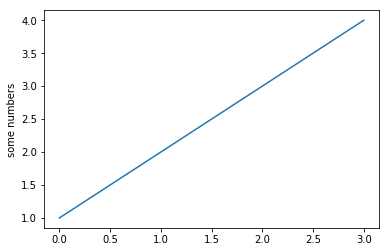

In [2]:

dog_files = np.array(glob("dogImages/*/*/*"))
    

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

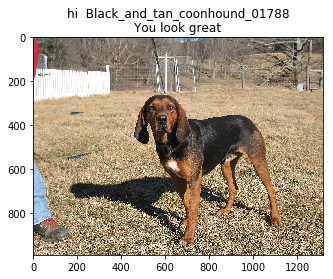

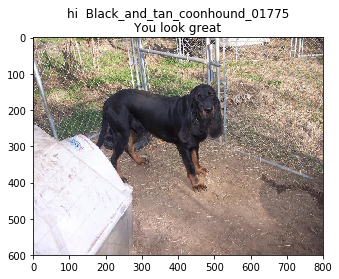

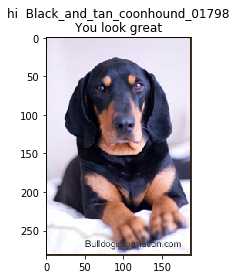

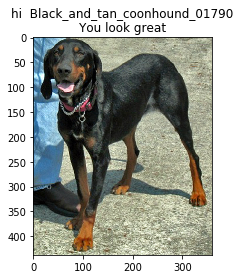

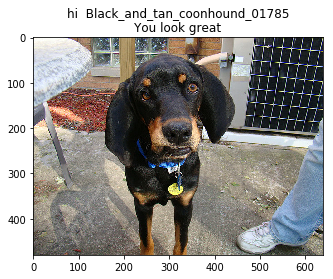

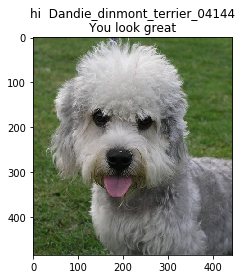

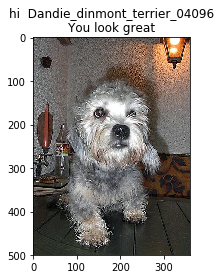

In [3]:
def greet(file):
    name = path.basename(file).split('.')[0]
    return "hi  {}\nYou look great".format(name), file

def run_app(file):
    greeting, img_path = greet(file)
    image = Image.open(img_path)
    plt.title(greeting)
    plt.imshow(image)
    
    plt.show()
    
for file in dog_files[:7]:
    run_app(file)
    
    


In [5]:
import torchvision.models as models
import torch.nn as nn
import torch

model_transfer = models.vgg16(pretrained=True)
n_inputs = model_transfer.classifier[6].in_features
# add last linear layer (n_inputs -> 133 dog breed classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer
for param in model_transfer.features.parameters():
    param.requires_grad = False

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if not use_cuda:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
# move tensors to GPU if CUDA is available
if use_cuda:
    model_transfer.cuda()
    
print(model_transfer)

CUDA is not available.  Training on CPU ...
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, d

In [8]:
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
device = torch.device('cpu')
#model = TheModelClass(*args, **kwargs)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=device))


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed

    image = Image.open(img_path)

    normalize = transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5],
    )

    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),  
        transforms.RandomRotation(15),
        #transforms.Resize(size),
        #transforms.CenterCrop(cropped_size),
        transforms.RandomResizedCrop(cropped_size),    
        transforms.ToTensor(),
        normalize
    ])

    tensor = transform(image)
    if use_cuda:
        tensor = tensor.cuda()

    out = model_transfer.forward(tensor.reshape(1, 3, cropped_size, cropped_size))
    if use_cuda:
        out = out.cpu()
    idx_of_max_value = out.detach().numpy().argmax()

    return class_names[idx_of_max_value]

In [3]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

data_dir = "./dogImages"

train_data = datasets.ImageFolder(data_dir + '/train')

class_names = [item[4:].replace("_", " ") for item in train_data.classes]
num_classes = len(class_names)
print(class_names)


['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker spaniel', 'Collie',